In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

In [2]:
def process_df(path):
    data = pd.read_csv(path)
    data.drop(data.columns[0], axis=1, inplace=True)
    data = data[2:]
    data.reset_index(drop=True, inplace=True)

    num_metrics = len(data.columns) // 4
    metric_names = [name.split('/')[1] for name in data.columns[:num_metrics]]
    agg_names = ['mean', 'min', 'max', 'std']

    # convert all values to float
    for col in data.columns:
        data[col] = data[col].astype(float)

    dfs = {}
    for i, metric in enumerate(metric_names):
        metric_data = data[data.columns[i::num_metrics]]
        metric_data.columns = agg_names 
        dfs[metric] = metric_data
    
    return dfs

In [3]:
example = "MNIST"
experiment = 'mnist_linear_eval_n1000'
experiment = 'ablation-decoder2'
experiment = 'AE_aug2'
path = f"Examples/{example}/out/logs/{experiment}/"
names = os.listdir(path)
encoder_data = {}
classifier_data = {}
for name in names:
    print(name)
    enc_path = path + name + '/encoder/reduction.csv'
    cla_path = path + name + '/classifier/reduction.csv'
    # load encoder data as pd dataframe
    if os.path.exists(enc_path):
        encoder_data[name] = process_df(enc_path)
    # load classifier data as pd dataframe
    if os.path.exists(cla_path):
        classifier_data[name] = process_df(cla_path)


aug
aug-n1
aug-n10
aug-n100
aug-n1000
no_aug
no_aug-n1
no_aug-n10
no_aug-n100
no_aug-n1000


In [4]:
# print mean test accuracies 
for experiment in classifier_data.keys():
    # print(f"Experiment: {experiment}")
    metric = 'test_acc'
    print(f"{experiment}: {classifier_data[experiment][metric]['mean'][0] * 100:.1f} +- {classifier_data[experiment][metric]['std'][0] * 100:.1f}")


aug-n1: 41.2 +- 4.1
aug-n10: 70.3 +- 2.0
aug-n100: 85.4 +- 2.2
aug-n1000: 92.1 +- 1.8
no_aug-n1: 40.7 +- 5.1
no_aug-n10: 69.1 +- 3.2
no_aug-n100: 86.3 +- 2.4
no_aug-n1000: 92.6 +- 3.1


In [11]:
classifier_data.keys() 

dict_keys(['base-n10', 'resnet18-n10', 'vit-n10'])

In [22]:
example = "MNIST"
experiment = 'ablation-HEPA-0-good_decoder2'
path = f"Examples/{example}/out/logs/{experiment}/"
names = os.listdir(path)
encoder_data = {}
classifier_data = {}
for name in names:
    print(name)
    enc_path = path + name + '/encoder/reduction.csv'
    cla_path = path + name + '/classifier/reduction.csv'
    # load encoder data as pd dataframe
    if os.path.exists(enc_path):
        encoder_data[name] = process_df(enc_path)
    # load classifier data as pd dataframe
    if os.path.exists(cla_path):
        classifier_data[name] = process_df(cla_path)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Examples/MNIST/out/logs/ablation-HEPA-0-good_decoder2/'

BYOL-n1
BYOL-n10
BYOL-n100
HEPA-0-n1
HEPA-0-n10
HEPA-0-n100
HEPA-L-n1
HEPA-L-n10
HEPA-L-n100
[0.7514599323272705, 0.926159930229187, 0.98013995885849] [0.02202824299699777, 0.004471891942240052, 0.0008848492900169301]


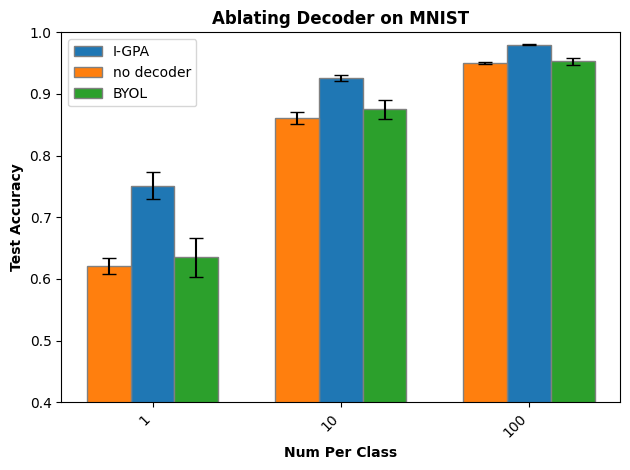

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifier_data is already defined as per your structure
# classifier_data is a dictionary with keys like 'base-n1', 'no_actions-n1'
# each value is a dictionary with keys like 'test_acc', where each value is a pandas dataframe

# Extract test accuracies and organize by nX
test_accs_by_n = {'n1': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                  'n10': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                  'n100': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}
                #   'n1000': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}

test_acc_std_by_n = {'n1': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                     'n10': {'I-GPA': None, 'no_decoder': None, 'BYOL': None},
                     'n100': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}
                    #  'n1000': {'I-GPA': None, 'no_decoder': None, 'BYOL': None}}

for key, trial in classifier_data.items():
    test_acc_value = trial['test_acc']['mean'].iloc[0]
    test_acc_std = trial['test_acc']['std'].iloc[0]
    algs = ['I-GPA', 'no_decoder', 'BYOL']
    algs_to_trial = {
        'I-GPA': 'HEPA-0',
        'no_decoder': 'HEPA-L',
        'BYOL': 'BYOL'
    }
    print(key)
    for alg in algs:
        if algs_to_trial[alg] in key:
            n_key = key.split('-')[-1]
            test_accs_by_n[n_key][alg] = test_acc_value
            test_acc_std_by_n[n_key][alg] = test_acc_std

# Prepare data for plotting
nX_labels = list(test_accs_by_n.keys())

igpa_values = [test_accs_by_n[n]['I-GPA'] for n in nX_labels]
igpa_std = [test_acc_std_by_n[n]['I-GPA'] for n in nX_labels]
print(igpa_values, igpa_std)

no_decoder_values = [test_accs_by_n[n]['no_decoder'] for n in nX_labels]
no_decoder_std = [test_acc_std_by_n[n]['no_decoder'] for n in nX_labels]

byol_values = [test_accs_by_n[n]['BYOL'] for n in nX_labels]
byol_std = [test_acc_std_by_n[n]['BYOL'] for n in nX_labels]

# Define bar width
bar_width = 0.2333

# Define the positions of the bars
r1 = np.arange(len(nX_labels)) - bar_width/2
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
fig, ax = plt.subplots()
bars1 = ax.bar(r2, igpa_values, yerr=igpa_std, width=bar_width, edgecolor='grey', label='I-GPA', capsize=5)
bars2 = ax.bar(r1, no_decoder_values, yerr=no_decoder_std, width=bar_width, edgecolor='grey', label='no decoder', capsize=5)
bars3 = ax.bar(r3, byol_values, yerr=byol_std, width=bar_width, edgecolor='grey', label='BYOL', capsize=5)

# Add labels and title
ax.set_xlabel('Num Per Class', fontweight='bold')
ax.set_ylabel('Test Accuracy', fontweight='bold')
ax.set_title('Ablating Decoder on MNIST', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(nX_labels))])
# ax.set_xticklabels(nX_labels)
ax.set_xticklabels(['1', '10', '100'])

# Add legend
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.4, 1.0)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


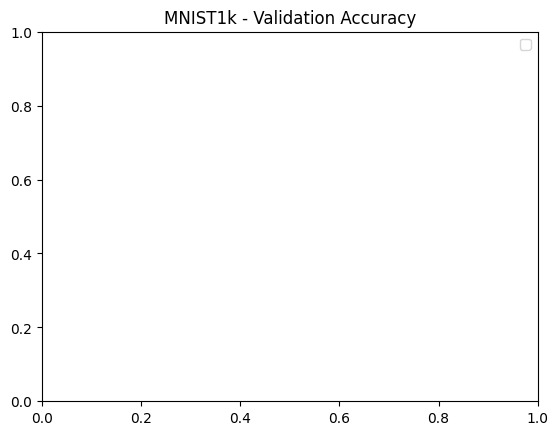

In [4]:
for key in encoder_data.keys():
    plt.plot(encoder_data[key]['1step_val_acc']['mean'], label=key)
    plt.fill_between(encoder_data[key]['1step_val_acc'].index, encoder_data[key]['1step_val_acc']['min'], encoder_data[key]['1step_val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()


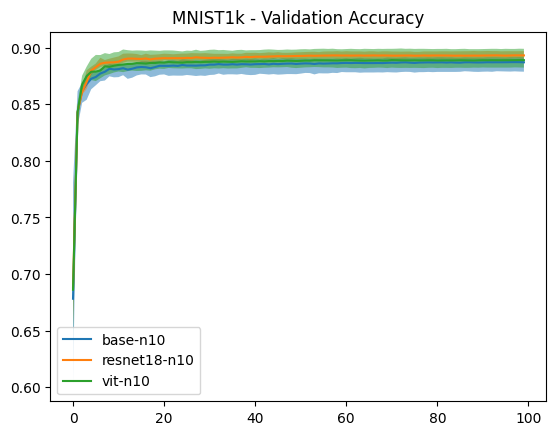

In [12]:
for key in encoder_data.keys():
    plt.plot(classifier_data[key]['val_acc']['mean'], label=key)
    plt.fill_between(classifier_data[key]['val_acc'].index, classifier_data[key]['val_acc']['min'], classifier_data[key]['val_acc']['max'], alpha=0.5)

plt.title('MNIST1k - Validation Accuracy')
plt.legend()
plt.show()